# Working with Training Data

## Import Data

In [313]:
import pandas as pd
import numpy as np

In [314]:
train_val_split = pd.read_csv('heart_failure_data/train_val_split.csv')

In [315]:
train_val_split

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
2,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
3,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
4,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
729,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
730,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
731,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
732,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1


## First, we have to scale the non-binary values with the StandardScalar class

In [316]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [317]:
cols_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']  

for col in cols_to_encode:
    train_val_split[col] = LabelEncoder().fit_transform(train_val_split[col])
    
data_to_scale = train_val_split.iloc[:,[0,3,4,7,9]]

In [318]:
scaler = StandardScaler().fit(data_to_scale)

scaled_data = scaler.transform(data_to_scale)

In [319]:
for i, item in enumerate(data_to_scale):
    train_val_split[item] = scaled_data[:,i]

data_scaled = train_val_split

In [320]:
data_scaled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.436389,1,1,0.426605,0.839367,0,1,1.415334,0,-0.808128,2,0
1,-1.755040,1,1,-0.110862,0.784273,0,2,-1.507570,0,-0.808128,2,0
2,-0.586654,0,0,0.319112,0.150695,0,1,-1.112583,1,0.578854,1,1
3,0.050648,1,2,0.964072,-0.023769,0,1,-0.559601,0,-0.808128,2,0
4,-1.542606,1,2,-0.648328,1.298482,0,1,1.336337,0,-0.808128,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
729,-1.330172,1,1,-0.648328,-0.372696,0,1,1.810321,0,-0.808128,2,0
730,0.369299,0,0,0.426605,0.398617,0,1,-0.520102,1,-0.623197,1,1
731,-0.905304,1,3,-1.185795,0.609810,0,1,-0.164614,0,0.301458,1,1
732,1.537686,1,0,0.641592,-0.042133,1,1,0.190875,0,2.335698,1,1


In [321]:
X = data_scaled.iloc[:,:-1]
Y = data_scaled.iloc[:,-1]

## Normal Lasso Regression

In [327]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso 

lasso = Lasso()
parameters = {'alpha':np.arange(0.001,0.1,0.001)}

search_lasso = GridSearchCV(lasso, parameters, cv=5, scoring = 'neg_root_mean_squared_error', verbose=3)

In [328]:
search_lasso.fit(X, Y)

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END ......................alpha=0.001;, score=-0.342 total time=   0.0s
[CV 2/5] END ......................alpha=0.001;, score=-0.341 total time=   0.0s
[CV 3/5] END ......................alpha=0.001;, score=-0.328 total time=   0.0s
[CV 4/5] END ......................alpha=0.001;, score=-0.385 total time=   0.0s
[CV 5/5] END ......................alpha=0.001;, score=-0.389 total time=   0.0s
[CV 1/5] END ......................alpha=0.002;, score=-0.342 total time=   0.0s
[CV 2/5] END ......................alpha=0.002;, score=-0.342 total time=   0.0s
[CV 3/5] END ......................alpha=0.002;, score=-0.328 total time=   0.0s
[CV 4/5] END ......................alpha=0.002;, score=-0.384 total time=   0.0s
[CV 5/5] END ......................alpha=0.002;, score=-0.389 total time=   0.0s
[CV 1/5] END ......................alpha=0.003;, score=-0.342 total time=   0.0s
[CV 2/5] END ......................alpha=0.003;

[CV 3/5] END ......................alpha=0.023;, score=-0.344 total time=   0.0s
[CV 4/5] END ......................alpha=0.023;, score=-0.385 total time=   0.0s
[CV 5/5] END ......................alpha=0.023;, score=-0.404 total time=   0.0s
[CV 1/5] END ......................alpha=0.024;, score=-0.360 total time=   0.0s
[CV 2/5] END ......................alpha=0.024;, score=-0.362 total time=   0.0s
[CV 3/5] END ......................alpha=0.024;, score=-0.346 total time=   0.0s
[CV 4/5] END ......................alpha=0.024;, score=-0.386 total time=   0.0s
[CV 5/5] END ......................alpha=0.024;, score=-0.405 total time=   0.0s
[CV 1/5] END ......................alpha=0.025;, score=-0.361 total time=   0.0s
[CV 2/5] END ......................alpha=0.025;, score=-0.363 total time=   0.0s
[CV 3/5] END ......................alpha=0.025;, score=-0.347 total time=   0.0s
[CV 4/5] END ......................alpha=0.025;, score=-0.386 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END ......................alpha=0.045;, score=-0.384 total time=   0.0s
[CV 4/5] END ......................alpha=0.045;, score=-0.394 total time=   0.0s
[CV 5/5] END ......................alpha=0.045;, score=-0.415 total time=   0.0s
[CV 1/5] END ......................alpha=0.046;, score=-0.389 total time=   0.0s
[CV 2/5] END ......................alpha=0.046;, score=-0.384 total time=   0.0s
[CV 3/5] END ......................alpha=0.046;, score=-0.386 total time=   0.0s
[CV 4/5] END ......................alpha=0.046;, score=-0.395 total time=   0.0s
[CV 5/5] END ......................alpha=0.046;, score=-0.415 total time=   0.0s
[CV 1/5] END ......................alpha=0.047;, score=-0.391 total time=   0.0s
[CV 2/5] END ......................alpha=0.047;, score=-0.385 total time=   0.0s
[CV 3/5] END ......................alpha=0.047;, score=-0.387 total time=   0.0s
[CV 4/5] END ......................alpha=0.047;, score=-0.395 total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END .......................alpha=0.07;, score=-0.405 total time=   0.0s
[CV 3/5] END .......................alpha=0.07;, score=-0.408 total time=   0.0s
[CV 4/5] END .......................alpha=0.07;, score=-0.404 total time=   0.0s
[CV 5/5] END .......................alpha=0.07;, score=-0.422 total time=   0.0s
[CV 1/5] END ........alpha=0.07100000000000001;, score=-0.422 total time=   0.0s
[CV 2/5] END ........alpha=0.07100000000000001;, score=-0.406 total time=   0.0s
[CV 3/5] END ........alpha=0.07100000000000001;, score=-0.408 total time=   0.0s
[CV 4/5] END ........alpha=0.07100000000000001;, score=-0.405 total time=   0.0s
[CV 5/5] END ........alpha=0.07100000000000001;, score=-0.422 total time=   0.0s
[CV 1/5] END ........alpha=0.07200000000000001;, score=-0.423 total time=   0.0s
[CV 2/5] END ........alpha=0.07200000000000001;, score=-0.406 total time=   0.0s
[CV 3/5] END ........alpha=0.07200000000000001;, score=-0.409 total time=   0.0s
[CV 4/5] END ........alpha=0

[CV 3/5] END ......................alpha=0.091;, score=-0.426 total time=   0.0s
[CV 4/5] END ......................alpha=0.091;, score=-0.415 total time=   0.0s
[CV 5/5] END ......................alpha=0.091;, score=-0.429 total time=   0.0s
[CV 1/5] END ......................alpha=0.092;, score=-0.446 total time=   0.0s
[CV 2/5] END ......................alpha=0.092;, score=-0.423 total time=   0.0s
[CV 3/5] END ......................alpha=0.092;, score=-0.427 total time=   0.0s
[CV 4/5] END ......................alpha=0.092;, score=-0.415 total time=   0.0s
[CV 5/5] END ......................alpha=0.092;, score=-0.430 total time=   0.0s
[CV 1/5] END ......................alpha=0.093;, score=-0.447 total time=   0.0s
[CV 2/5] END ......................alpha=0.093;, score=-0.423 total time=   0.0s
[CV 3/5] END ......................alpha=0.093;, score=-0.427 total time=   0.0s
[CV 4/5] END ......................alpha=0.093;, score=-0.416 total time=   0.0s
[CV 5/5] END ...............

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099])},
             scoring='neg_root_mean_squared_error', verbose=3)

In [329]:
search_lasso.best_params_['alpha']

0.001

In [330]:
coef_lasso = search_lasso.best_estimator_.coef_
coef_lasso

array([ 0.02987988,  0.17855545, -0.09375704,  0.003009  , -0.05884505,
        0.12765329, -0.0176006 , -0.03617202,  0.18370757,  0.06419146,
       -0.23605065])

11


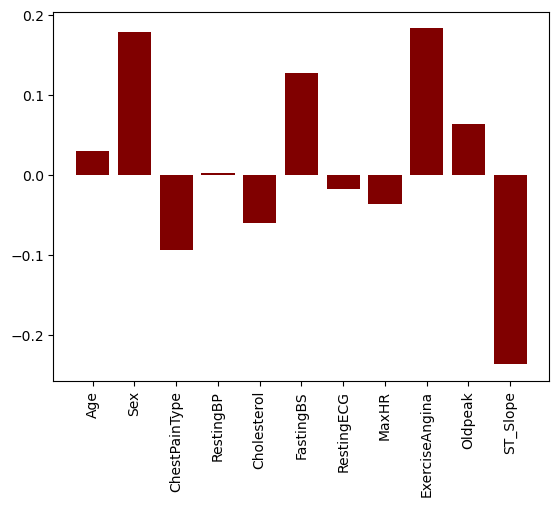

In [331]:
from matplotlib import pyplot as plt

lables = data_scaled.columns[:-1]
print(len(lables))
plt.bar(lables, coef_lasso, color ='maroon')
plt.xticks(ticks = range(len(lables)), labels = lables, rotation = 90)
plt.show()

## Logistic regression with l1 penalty term (lasso)

In [332]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

_lambda = 10 
c = 1/_lambda  

log_lasso = LogisticRegression(penalty = 'l1', solver = 'saga', C = c)
parameters = {'C':np.arange(1/3,1/0.1,0.1)}

search_log = GridSearchCV(log_lasso, parameters, cv=5, scoring = 'neg_root_mean_squared_error', verbose=3)

In [333]:
log_lasso.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [334]:
search_log.fit(X,Y)

Fitting 5 folds for each of 97 candidates, totalling 485 fits
[CV 1/5] END .............C=0.3333333333333333;, score=-0.459 total time=   0.0s
[CV 2/5] END .............C=0.3333333333333333;, score=-0.429 total time=   0.0s
[CV 3/5] END .............C=0.3333333333333333;, score=-0.421 total time=   0.0s
[CV 4/5] END .............C=0.3333333333333333;, score=-0.396 total time=   0.0s
[CV 5/5] END .............C=0.3333333333333333;, score=-0.483 total time=   0.0s
[CV 1/5] END ............C=0.43333333333333335;, score=-0.459 total time=   0.0s
[CV 2/5] END ............C=0.43333333333333335;, score=-0.429 total time=   0.0s
[CV 3/5] END ............C=0.43333333333333335;, score=-0.412 total time=   0.0s
[CV 4/5] END ............C=0.43333333333333335;, score=-0.396 total time=   0.0s
[CV 5/5] END ............C=0.43333333333333335;, score=-0.483 total time=   0.0s
[CV 1/5] END .............C=0.5333333333333334;, score=-0.459 total time=   0.0s
[CV 2/5] END .............C=0.5333333333333334;

[CV 3/5] END ..............C=2.533333333333334;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=2.533333333333334;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=2.533333333333334;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=2.633333333333334;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=2.633333333333334;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=2.633333333333334;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=2.633333333333334;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=2.633333333333334;, score=-0.461 total time=   0.0s
[CV 1/5] END .............C=2.7333333333333343;, score=-0.459 total time=   0.0s
[CV 2/5] END .............C=2.7333333333333343;, score=-0.436 total time=   0.0s
[CV 3/5] END .............C=2.7333333333333343;, score=-0.421 total time=   0.0s
[CV 4/5] END .............C=2.7333333333333343;, score=-0.404 total time=   0.0s
[CV 5/5] END .............C=

[CV 1/5] END ..............C=4.633333333333335;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=4.633333333333335;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=4.633333333333335;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=4.633333333333335;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=4.633333333333335;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=4.733333333333334;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=4.733333333333334;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=4.733333333333334;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=4.733333333333334;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=4.733333333333334;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=4.833333333333335;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=4.833333333333335;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C

[CV 4/5] END ..............C=6.733333333333335;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=6.733333333333335;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=6.833333333333335;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=6.833333333333335;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=6.833333333333335;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=6.833333333333335;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=6.833333333333335;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=6.933333333333335;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=6.933333333333335;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=6.933333333333335;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=6.933333333333335;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=6.933333333333335;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C

[CV 1/5] END ..............C=9.033333333333337;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=9.033333333333337;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=9.033333333333337;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=9.033333333333337;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=9.033333333333337;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=9.133333333333336;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=9.133333333333336;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=9.133333333333336;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=9.133333333333336;, score=-0.404 total time=   0.0s
[CV 5/5] END ..............C=9.133333333333336;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=9.233333333333336;, score=-0.459 total time=   0.0s
[CV 2/5] END ..............C=9.233333333333336;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.1, penalty='l1', solver='saga'),
             param_grid={'C': array([0.33333333, 0.43333333, 0.53333333, 0.63333333, 0.73333333,
       0.83333333, 0.93333333, 1.03333333, 1.13333333, 1.23333333,
       1.33333333, 1.43333333, 1.53333333, 1.63333333, 1.73333333,
       1.83333333, 1.93333333, 2.03333333, 2.13333333, 2.23333333,
       2.33333333, 2.43333333, 2.53...
       6.83333333, 6.93333333, 7.03333333, 7.13333333, 7.23333333,
       7.33333333, 7.43333333, 7.53333333, 7.63333333, 7.73333333,
       7.83333333, 7.93333333, 8.03333333, 8.13333333, 8.23333333,
       8.33333333, 8.43333333, 8.53333333, 8.63333333, 8.73333333,
       8.83333333, 8.93333333, 9.03333333, 9.13333333, 9.23333333,
       9.33333333, 9.43333333, 9.53333333, 9.63333333, 9.73333333,
       9.83333333, 9.93333333])},
             scoring='neg_root_mean_squared_error', verbose=3)

In [335]:
_lambda = 1/search_log.best_params_['C']
_lambda

1.8749999999999996

In [336]:
coef_log = search_log.best_estimator_.coef_
coef_log[0]

array([ 0.23118053,  1.35129713, -0.65933011,  0.01029501, -0.39185455,
        0.80759757, -0.10186189, -0.19462477,  1.03423965,  0.47018166,
       -1.6301376 ])

11


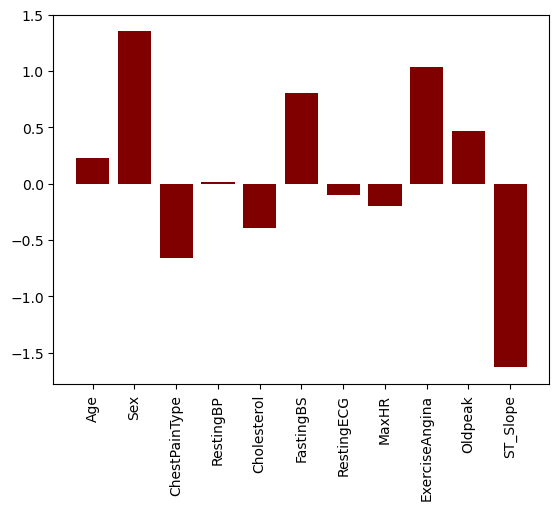

In [337]:
from matplotlib import pyplot as plt

lables = data_scaled.columns[:-1]
print(len(lables))
plt.bar(lables, coef_log[0], color ='maroon')
plt.xticks(ticks = range(len(lables)), labels = lables, rotation = 90)
plt.show()

## Logistic Lasso without scaling (just for fun)

In [338]:
train_val_split = pd.read_csv('heart_failure_data/train_val_split.csv')

In [339]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

_lambda = 10 
c = 1/_lambda  

log_lasso = LogisticRegression(penalty = 'l1', solver = 'saga', C = c)
parameters = {'C':np.arange(1/3,1/0.1,0.1)}

search_log = GridSearchCV(log_lasso, parameters, cv=5, scoring = 'neg_root_mean_squared_error', verbose=3)

In [340]:
cols_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']  

for col in cols_to_encode:
    train_val_split[col] = LabelEncoder().fit_transform(train_val_split[col])
    
train_val_split

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,37,1,1,130,283,0,2,98,0,0.0,2,0
2,48,0,0,138,214,0,1,108,1,1.5,1,1
3,54,1,2,150,195,0,1,122,0,0.0,2,0
4,39,1,2,120,339,0,1,170,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
729,41,1,1,120,157,0,1,182,0,0.0,2,0
730,57,0,0,140,241,0,1,123,1,0.2,1,1
731,45,1,3,110,264,0,1,132,0,1.2,1,1
732,68,1,0,144,193,1,1,141,0,3.4,1,1


In [341]:
X_unscaled = train_val_split.iloc[:,:-1]
Y_unscaled = train_val_split.iloc[:,-1]

X_unscaled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,37,1,1,130,283,0,2,98,0,0.0,2
2,48,0,0,138,214,0,1,108,1,1.5,1
3,54,1,2,150,195,0,1,122,0,0.0,2
4,39,1,2,120,339,0,1,170,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...
729,41,1,1,120,157,0,1,182,0,0.0,2
730,57,0,0,140,241,0,1,123,1,0.2,1
731,45,1,3,110,264,0,1,132,0,1.2,1
732,68,1,0,144,193,1,1,141,0,3.4,1


In [342]:
X_train, X_test, y_train, y_test = train_test_split(X_unscaled,Y_unscaled, test_size = 0.33, random_state=42)

In [343]:
search_log.fit(X_train,y_train)

Fitting 5 folds for each of 97 candidates, totalling 485 fits
[CV 1/5] END .............C=0.3333333333333333;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=0.3333333333333333;, score=-0.544 total time=   0.0s
[CV 3/5] END .............C=0.3333333333333333;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=0.3333333333333333;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=0.3333333333333333;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ............C=0.43333333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ............C=0.43333333333333335;, score=-0.544 total time=   0.0s
[CV 3/5] END ............C=0.43333333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ............C=0.43333333333333335;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END ............C=0.43333333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=0.5333333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=0.5333333333333334;, score=-0.544 total time=   0.0s
[CV 3/5] END .............C=0.5333333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=0.5333333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=0.5333333333333334;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END .............C=0.6333333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=0.6333333333333334;, score=-0.544 total time=   0.0s
[CV 3/5] END .............C=0.6333333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=0.6333333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=0.6333333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=0.7333333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=0.7333333333333334;, score=-0.544 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END .............C=0.7333333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=0.7333333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=0.7333333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=0.8333333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=0.8333333333333335;, score=-0.544 total time=   0.0s
[CV 3/5] END .............C=0.8333333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=0.8333333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=0.8333333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=0.9333333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=0.9333333333333336;, score=-0.544 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END .............C=0.9333333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=0.9333333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=0.9333333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.0333333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.0333333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.0333333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.0333333333333334;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END .............C=1.0333333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.1333333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.1333333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.1333333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.1333333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=1.1333333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.2333333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.2333333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.2333333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.2333333333333336;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END .............C=1.2333333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.3333333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.3333333333333337;, score=-0.544 total time=   0.0s
[CV 3/5] END .............C=1.3333333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.3333333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=1.3333333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.4333333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.4333333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.4333333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.4333333333333336;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END .............C=1.4333333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.5333333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.5333333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.5333333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.5333333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=1.5333333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.6333333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.6333333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.6333333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.6333333333333337;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END .............C=1.6333333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.7333333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.7333333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.7333333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.7333333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=1.7333333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.8333333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=1.8333333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.8333333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.8333333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=1.8333333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=1.9333333333333338;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END .............C=1.9333333333333338;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=1.9333333333333338;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=1.9333333333333338;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=1.9333333333333338;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=2.033333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=2.033333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=2.033333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=2.033333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=2.033333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=2.133333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=2.133333333333334;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END ..............C=2.133333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=2.133333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=2.133333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=2.233333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=2.233333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=2.233333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=2.233333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=2.233333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=2.3333333333333344;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=2.3333333333333344;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END .............C=2.3333333333333344;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=2.3333333333333344;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=2.3333333333333344;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=2.433333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=2.433333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=2.433333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=2.433333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=2.433333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=2.533333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=2.533333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=2.533333333333334;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END ..............C=2.533333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=2.533333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=2.633333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=2.633333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=2.633333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=2.633333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=2.633333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=2.7333333333333343;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=2.7333333333333343;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=2.7333333333333343;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END .............C=2.7333333333333343;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=2.7333333333333343;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=2.8333333333333344;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=2.8333333333333344;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=2.8333333333333344;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=2.8333333333333344;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=2.8333333333333344;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=2.9333333333333345;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END .............C=2.9333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=2.9333333333333345;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=2.9333333333333345;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=2.9333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=3.0333333333333345;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=3.0333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=3.0333333333333345;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END .............C=3.0333333333333345;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=3.0333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=3.133333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=3.133333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=3.133333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=3.133333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=3.133333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=3.2333333333333343;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=3.2333333333333343;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=3.2333333333333343;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=3.2333333333333343;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END .............C=3.2333333333333343;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=3.3333333333333344;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=3.3333333333333344;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=3.3333333333333344;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=3.3333333333333344;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=3.3333333333333344;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=3.4333333333333345;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END .............C=3.4333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=3.4333333333333345;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=3.4333333333333345;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=3.4333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=3.5333333333333345;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=3.5333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=3.5333333333333345;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=3.5333333333333345;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=3.5333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=3.6333333333333346;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END .............C=3.6333333333333346;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=3.6333333333333346;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=3.6333333333333346;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=3.6333333333333346;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=3.7333333333333347;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=3.7333333333333347;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=3.7333333333333347;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END .............C=3.7333333333333347;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=3.7333333333333347;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=3.833333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=3.833333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=3.833333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=3.833333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=3.833333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=3.933333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=3.933333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=3.933333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=3.933333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=3.933333333333335;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ..............C=4.033333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.033333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.033333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=4.033333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=4.033333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=4.133333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.133333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.133333333333335;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END ..............C=4.133333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=4.133333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=4.233333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.233333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.233333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=4.233333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=4.233333333333334;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ..............C=4.333333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.333333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.333333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=4.333333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=4.333333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=4.4333333333333345;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=4.4333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=4.4333333333333345;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END .............C=4.4333333333333345;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=4.4333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=4.533333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.533333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.533333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=4.533333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=4.533333333333334;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ..............C=4.633333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.633333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.633333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=4.633333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=4.633333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=4.733333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.733333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.733333333333334;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=4.733333333333334;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END ..............C=4.733333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=4.833333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=4.833333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=4.833333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=4.833333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=4.833333333333335;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END .............C=4.9333333333333345;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=4.9333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=4.9333333333333345;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=4.9333333333333345;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=4.9333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=5.033333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.033333333333335;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END ..............C=5.033333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=5.033333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=5.033333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=5.133333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.133333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=5.133333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=5.133333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=5.133333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=5.233333333333334;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.233333333333334;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=5.233333333333334;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END ..............C=5.233333333333334;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=5.233333333333334;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=5.333333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.333333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=5.333333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=5.333333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=5.333333333333335;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END .............C=5.4333333333333345;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=5.4333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=5.4333333333333345;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=5.4333333333333345;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=5.4333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=5.533333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.533333333333335;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END ..............C=5.533333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=5.533333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=5.533333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=5.633333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.633333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=5.633333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=5.633333333333335;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END ..............C=5.633333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=5.733333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.733333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=5.733333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=5.733333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=5.733333333333335;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ..............C=5.833333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=5.833333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=5.833333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=5.833333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=5.833333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=5.9333333333333345;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=5.9333333333333345;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=5.9333333333333345;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=5.9333333333333345;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END .............C=5.9333333333333345;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.033333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=6.033333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.033333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.033333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.033333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.133333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=6.133333333333335;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END ..............C=6.133333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.133333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.133333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.233333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=6.233333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.233333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.233333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.233333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.333333333333335;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END ..............C=6.333333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.333333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.333333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.333333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.433333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=6.433333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.433333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.433333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.433333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.533333333333335;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END ..............C=6.533333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.533333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.533333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.533333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=6.6333333333333355;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=6.6333333333333355;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=6.6333333333333355;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=6.6333333333333355;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END .............C=6.6333333333333355;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.733333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=6.733333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.733333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.733333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.733333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.833333333333335;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END ..............C=6.833333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.833333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.833333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=6.833333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=6.933333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=6.933333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=6.933333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=6.933333333333335;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END ..............C=6.933333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=7.033333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=7.033333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.033333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.033333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=7.033333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=7.1333333333333355;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END .............C=7.1333333333333355;, score=-0.535 total time=   0.0s
[CV 3/5] END .............C=7.1333333333333355;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=7.1333333333333355;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=7.1333333333333355;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=7.233333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=7.233333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.233333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.233333333333335;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END ..............C=7.233333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=7.333333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=7.333333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.333333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.333333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=7.333333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=7.433333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=7.433333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.433333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.433333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=7.433333333333335;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ..............C=7.533333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=7.533333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.533333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.533333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=7.533333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END .............C=7.6333333333333355;, score=-0.586 total time=   0.0s
[CV 2/5] END .............C=7.6333333333333355;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END .............C=7.6333333333333355;, score=-0.484 total time=   0.0s
[CV 4/5] END .............C=7.6333333333333355;, score=-0.562 total time=   0.0s
[CV 5/5] END .............C=7.6333333333333355;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=7.733333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=7.733333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.733333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.733333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=7.733333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=7.833333333333336;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END ..............C=7.833333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.833333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.833333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=7.833333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=7.933333333333335;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=7.933333333333335;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=7.933333333333335;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=7.933333333333335;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=7.933333333333335;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.033333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.033333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.033333333333337;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END ..............C=8.033333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.033333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.133333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.133333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.133333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.133333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.133333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.233333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.233333333333336;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END ..............C=8.233333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.233333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.233333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.333333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.333333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.333333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.333333333333337;, score=-0.562 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 5/5] END ..............C=8.333333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.433333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.433333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.433333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.433333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.433333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.533333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.533333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.533333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.533333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.533333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.633333333333336;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END ..............C=8.633333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.633333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.633333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.633333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.733333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.733333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.733333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.733333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.733333333333336;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ..............C=8.833333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=8.833333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.833333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.833333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.833333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=8.933333333333337;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END ..............C=8.933333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=8.933333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=8.933333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=8.933333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.033333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.033333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.033333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.033333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.033333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.133333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.133333333333336;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END ..............C=9.133333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.133333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.133333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.233333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.233333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.233333333333336;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.233333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.233333333333336;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 1/5] END ..............C=9.333333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.333333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.333333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.333333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.333333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.433333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.433333333333337;, score=-0.535 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 3/5] END ..............C=9.433333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.433333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.433333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.533333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.533333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.533333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.533333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.533333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.633333333333336;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.633333333333336;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.633333333333336;, score=-0.484 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 4/5] END ..............C=9.633333333333336;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.633333333333336;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.733333333333338;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.733333333333338;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.733333333333338;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.733333333333338;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.733333333333338;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.833333333333337;, score=-0.586 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter 

[CV 2/5] END ..............C=9.833333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.833333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.833333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.833333333333337;, score=-0.606 total time=   0.0s
[CV 1/5] END ..............C=9.933333333333337;, score=-0.586 total time=   0.0s
[CV 2/5] END ..............C=9.933333333333337;, score=-0.535 total time=   0.0s
[CV 3/5] END ..............C=9.933333333333337;, score=-0.484 total time=   0.0s
[CV 4/5] END ..............C=9.933333333333337;, score=-0.562 total time=   0.0s
[CV 5/5] END ..............C=9.933333333333337;, score=-0.606 total time=   0.0s


C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\timfl\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.1, penalty='l1', solver='saga'),
             param_grid={'C': array([0.33333333, 0.43333333, 0.53333333, 0.63333333, 0.73333333,
       0.83333333, 0.93333333, 1.03333333, 1.13333333, 1.23333333,
       1.33333333, 1.43333333, 1.53333333, 1.63333333, 1.73333333,
       1.83333333, 1.93333333, 2.03333333, 2.13333333, 2.23333333,
       2.33333333, 2.43333333, 2.53...
       6.83333333, 6.93333333, 7.03333333, 7.13333333, 7.23333333,
       7.33333333, 7.43333333, 7.53333333, 7.63333333, 7.73333333,
       7.83333333, 7.93333333, 8.03333333, 8.13333333, 8.23333333,
       8.33333333, 8.43333333, 8.53333333, 8.63333333, 8.73333333,
       8.83333333, 8.93333333, 9.03333333, 9.13333333, 9.23333333,
       9.33333333, 9.43333333, 9.53333333, 9.63333333, 9.73333333,
       9.83333333, 9.93333333])},
             scoring='neg_root_mean_squared_error', verbose=3)

In [344]:
_lambda = 1/search_log.best_params_['C']
_lambda

0.9677419354838709

In [345]:
coef_unscaled = search_log.best_estimator_.coef_
coef_unscaled[0]

array([ 0.04675682,  0.01638944, -0.03628249,  0.01127844, -0.00391038,
        0.01012017,  0.0013503 , -0.02161935,  0.02676787,  0.05190264,
       -0.03544989])

11


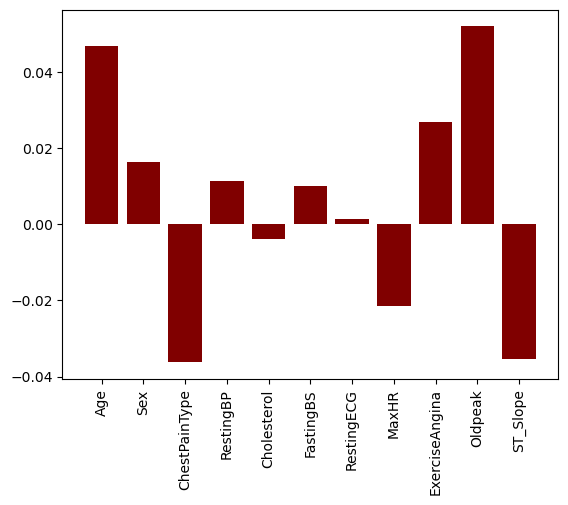

In [346]:
from matplotlib import pyplot as plt

lables = data_scaled.columns[:-1]
print(len(lables))
plt.bar(lables, coef_unscaled[0], color ='maroon')
plt.xticks(ticks = range(len(lables)), labels = lables, rotation = 90)
plt.show()

This is why scaling is important 

# Applying to Test Data

## Data Scaling

In [347]:
test_split = pd.read_csv('heart_failure_data/test_split.csv')

In [348]:
test_split

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,60,M,ASY,145,282,0,LVH,142,Y,2.8,Flat,1
1,57,M,ASY,160,0,1,Normal,98,Y,2.0,Flat,1
2,62,F,ASY,150,244,0,Normal,154,Y,1.4,Flat,1
3,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
4,57,M,ASY,128,0,1,ST,148,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,57,M,ASY,140,192,0,Normal,148,N,0.4,Flat,0
180,52,M,ATA,120,284,0,Normal,118,N,0.0,Up,0
181,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0
182,48,M,ASY,130,256,1,LVH,150,Y,0.0,Up,1


In [349]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [350]:
cols_to_encode = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']  

for col in cols_to_encode:
    test_split[col] = LabelEncoder().fit_transform(test_split[col])
    
data_to_scale = test_split.iloc[:,[0,3,4,7,9]]

data_to_scale

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,60,145,282,142,2.8
1,57,160,0,98,2.0
2,62,150,244,154,1.4
3,59,164,176,90,1.0
4,57,128,0,148,1.0
...,...,...,...,...,...
179,57,140,192,148,0.4
180,52,120,284,118,0.0
181,38,138,175,173,0.0
182,48,130,256,150,0.0


In [351]:
scaler = StandardScaler().fit(data_to_scale)

scaled_data = scaler.transform(data_to_scale)

In [352]:
for i, item in enumerate(data_to_scale):
    test_split[item] = scaled_data[:,i]

test_scaled = test_split

In [353]:
test_scaled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.689801,1,0,0.625126,0.706987,0,0,0.101967,1,1.859217,1,1
1,0.373284,1,0,1.457021,-1.836988,1,1,-1.603661,1,1.059227,1,1
2,0.900812,0,0,0.902425,0.364181,0,1,0.567138,1,0.459234,1,1
3,0.584295,1,0,1.678859,-0.249259,1,0,-1.913775,0,0.059238,1,1
4,0.373284,1,0,-0.317687,-1.836988,1,2,0.334552,1,0.059238,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.373284,1,0,0.347828,-0.104920,0,1,0.334552,0,-0.540755,1,0
180,-0.154245,1,1,-0.761364,0.725029,0,1,-0.828375,0,-0.940750,2,0
181,-1.631325,1,2,0.236909,-0.258281,0,1,1.303659,0,-0.940750,2,0
182,-0.576268,1,0,-0.206768,0.472436,1,0,0.412081,1,-0.940750,2,1


## Prediction in Test-case

In [354]:
X_testcase = test_scaled.iloc[:,:-1]
Y_testcase = test_scaled.iloc[:,-1]

### Prediction and evaluation with F1-score

In [355]:
y_pred_test = search_log.predict(X_testcase)
y_pred_test

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [356]:
np.array(Y_testcase)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [357]:
from sklearn.metrics import f1_score
print(f1_score(Y_testcase, y_pred_test))

0.7213114754098361


# Fitting regular Logistic Regression

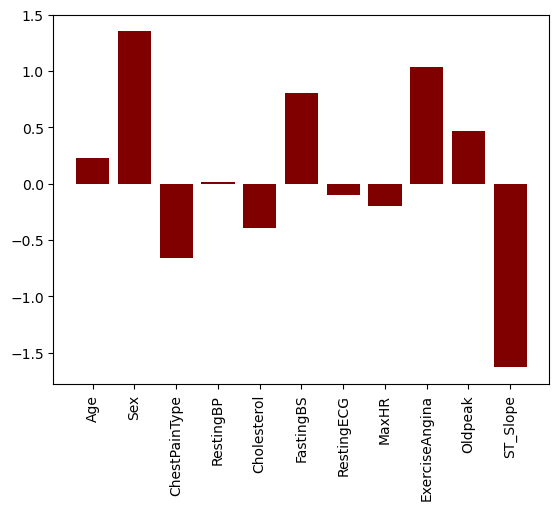

In the case of the logistic regression with l1-penalty, we can see that the features 'RestingBP' and 'RestingECG' do not contribute a lot to the overall result. Thus, we can remove them from the data set. We can now fit a regular Logistic Regression only with the most important features.

In [388]:
test_scaled

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.689801,1,0,0.625126,0.706987,0,0,0.101967,1,1.859217,1,1
1,0.373284,1,0,1.457021,-1.836988,1,1,-1.603661,1,1.059227,1,1
2,0.900812,0,0,0.902425,0.364181,0,1,0.567138,1,0.459234,1,1
3,0.584295,1,0,1.678859,-0.249259,1,0,-1.913775,0,0.059238,1,1
4,0.373284,1,0,-0.317687,-1.836988,1,2,0.334552,1,0.059238,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
179,0.373284,1,0,0.347828,-0.104920,0,1,0.334552,0,-0.540755,1,0
180,-0.154245,1,1,-0.761364,0.725029,0,1,-0.828375,0,-0.940750,2,0
181,-1.631325,1,2,0.236909,-0.258281,0,1,1.303659,0,-0.940750,2,0
182,-0.576268,1,0,-0.206768,0.472436,1,0,0.412081,1,-0.940750,2,1


In [389]:
test_scaled

new_test = test_scaled.drop(['RestingBP', 'RestingECG'], axis=1)

X_testcase_new = new_test.iloc[:,:-1]
Y_testcase_new = new_test.iloc[:,-1]

In [390]:
data_scaled

new_train = data_scaled.drop(['RestingBP', 'RestingECG'], axis=1)
X_traincase_new = new_train.iloc[:,:-1]
Y_traincase_new = new_train.iloc[:,-1]

In [391]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
parameters = {'C':np.arange(1/3,1/0.1,0.1)}

search_lr = GridSearchCV(lr, parameters, cv=5, scoring = 'neg_root_mean_squared_error', verbose=3)

In [392]:
search_lr.fit(X_traincase_new, Y_traincase_new)

Fitting 5 folds for each of 97 candidates, totalling 485 fits
[CV 1/5] END .............C=0.3333333333333333;, score=-0.444 total time=   0.0s
[CV 2/5] END .............C=0.3333333333333333;, score=-0.436 total time=   0.0s
[CV 3/5] END .............C=0.3333333333333333;, score=-0.421 total time=   0.0s
[CV 4/5] END .............C=0.3333333333333333;, score=-0.387 total time=   0.0s
[CV 5/5] END .............C=0.3333333333333333;, score=-0.468 total time=   0.0s
[CV 1/5] END ............C=0.43333333333333335;, score=-0.444 total time=   0.0s
[CV 2/5] END ............C=0.43333333333333335;, score=-0.436 total time=   0.0s
[CV 3/5] END ............C=0.43333333333333335;, score=-0.421 total time=   0.0s
[CV 4/5] END ............C=0.43333333333333335;, score=-0.387 total time=   0.0s
[CV 5/5] END ............C=0.43333333333333335;, score=-0.475 total time=   0.0s
[CV 1/5] END .............C=0.5333333333333334;, score=-0.444 total time=   0.0s
[CV 2/5] END .............C=0.5333333333333334;

[CV 2/5] END ..............C=2.533333333333334;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=2.533333333333334;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=2.533333333333334;, score=-0.387 total time=   0.0s
[CV 5/5] END ..............C=2.533333333333334;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=2.633333333333334;, score=-0.452 total time=   0.0s
[CV 2/5] END ..............C=2.633333333333334;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=2.633333333333334;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=2.633333333333334;, score=-0.387 total time=   0.0s
[CV 5/5] END ..............C=2.633333333333334;, score=-0.461 total time=   0.0s
[CV 1/5] END .............C=2.7333333333333343;, score=-0.452 total time=   0.0s
[CV 2/5] END .............C=2.7333333333333343;, score=-0.436 total time=   0.0s
[CV 3/5] END .............C=2.7333333333333343;, score=-0.421 total time=   0.0s
[CV 4/5] END .............C=

[CV 5/5] END ..............C=4.833333333333335;, score=-0.461 total time=   0.0s
[CV 1/5] END .............C=4.9333333333333345;, score=-0.452 total time=   0.0s
[CV 2/5] END .............C=4.9333333333333345;, score=-0.436 total time=   0.0s
[CV 3/5] END .............C=4.9333333333333345;, score=-0.421 total time=   0.0s
[CV 4/5] END .............C=4.9333333333333345;, score=-0.387 total time=   0.0s
[CV 5/5] END .............C=4.9333333333333345;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=5.033333333333335;, score=-0.452 total time=   0.0s
[CV 2/5] END ..............C=5.033333333333335;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=5.033333333333335;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=5.033333333333335;, score=-0.387 total time=   0.0s
[CV 5/5] END ..............C=5.033333333333335;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=5.133333333333335;, score=-0.452 total time=   0.0s
[CV 2/5] END ..............C

[CV 1/5] END .............C=7.1333333333333355;, score=-0.452 total time=   0.0s
[CV 2/5] END .............C=7.1333333333333355;, score=-0.436 total time=   0.0s
[CV 3/5] END .............C=7.1333333333333355;, score=-0.421 total time=   0.0s
[CV 4/5] END .............C=7.1333333333333355;, score=-0.387 total time=   0.0s
[CV 5/5] END .............C=7.1333333333333355;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=7.233333333333335;, score=-0.452 total time=   0.0s
[CV 2/5] END ..............C=7.233333333333335;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=7.233333333333335;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=7.233333333333335;, score=-0.387 total time=   0.0s
[CV 5/5] END ..............C=7.233333333333335;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=7.333333333333336;, score=-0.452 total time=   0.0s
[CV 2/5] END ..............C=7.333333333333336;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C

[CV 2/5] END ..............C=9.433333333333337;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=9.433333333333337;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=9.433333333333337;, score=-0.387 total time=   0.0s
[CV 5/5] END ..............C=9.433333333333337;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=9.533333333333337;, score=-0.452 total time=   0.0s
[CV 2/5] END ..............C=9.533333333333337;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=9.533333333333337;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C=9.533333333333337;, score=-0.387 total time=   0.0s
[CV 5/5] END ..............C=9.533333333333337;, score=-0.461 total time=   0.0s
[CV 1/5] END ..............C=9.633333333333336;, score=-0.452 total time=   0.0s
[CV 2/5] END ..............C=9.633333333333336;, score=-0.436 total time=   0.0s
[CV 3/5] END ..............C=9.633333333333336;, score=-0.421 total time=   0.0s
[CV 4/5] END ..............C

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.33333333, 0.43333333, 0.53333333, 0.63333333, 0.73333333,
       0.83333333, 0.93333333, 1.03333333, 1.13333333, 1.23333333,
       1.33333333, 1.43333333, 1.53333333, 1.63333333, 1.73333333,
       1.83333333, 1.93333333, 2.03333333, 2.13333333, 2.23333333,
       2.33333333, 2.43333333, 2.53333333, 2.63333333, 2.73333333,
       2.8...
       6.83333333, 6.93333333, 7.03333333, 7.13333333, 7.23333333,
       7.33333333, 7.43333333, 7.53333333, 7.63333333, 7.73333333,
       7.83333333, 7.93333333, 8.03333333, 8.13333333, 8.23333333,
       8.33333333, 8.43333333, 8.53333333, 8.63333333, 8.73333333,
       8.83333333, 8.93333333, 9.03333333, 9.13333333, 9.23333333,
       9.33333333, 9.43333333, 9.53333333, 9.63333333, 9.73333333,
       9.83333333, 9.93333333])},
             scoring='neg_root_mean_squared_error', verbose=3)

In [393]:
search_lr.best_params_['C']

0.5333333333333334

In [394]:
coef_log = search_lr.best_estimator_.coef_
coef_log[0]

array([ 0.24842088,  1.28523258, -0.66441809, -0.39153498,  0.82643357,
       -0.20582613,  1.01967628,  0.49906236, -1.56951484])

9


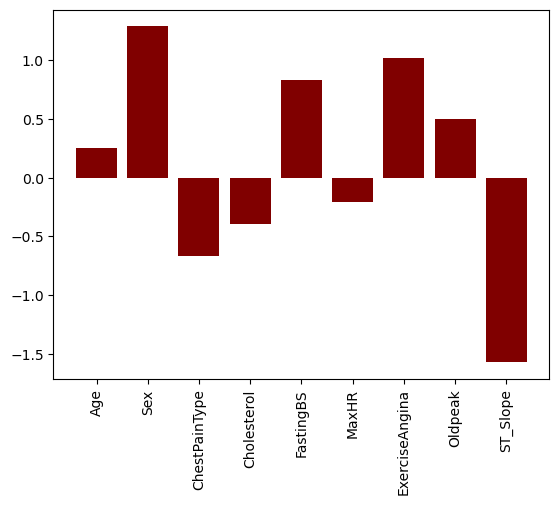

In [395]:
lables = new_train.columns[:-1]
print(len(lables))
plt.bar(lables, coef_log[0], color ='maroon')
plt.xticks(ticks = range(len(lables)), labels = lables, rotation = 90)
plt.show()

In [396]:
X_testcase_new

,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,0.689801,1,0,0.706987,0,0.101967,1,1.859217,1
1,0.373284,1,0,-1.836988,1,-1.603661,1,1.059227,1
2,0.900812,0,0,0.364181,0,0.567138,1,0.459234,1
3,0.584295,1,0,-0.249259,1,-1.913775,0,0.059238,1
4,0.373284,1,0,-1.836988,1,0.334552,1,0.059238,1
...,...,...,...,...,...,...,...,...,...
179,0.373284,1,0,-0.104920,0,0.334552,0,-0.540755,1
180,-0.154245,1,1,0.725029,0,-0.828375,0,-0.940750,2
181,-1.631325,1,2,-0.258281,0,1.303659,0,-0.940750,2
182,-0.576268,1,0,0.472436,1,0.412081,1,-0.940750,2


In [397]:
Y_testcase_new

0      1
1      1
2      1
3      1
4      1
      ..
179    0
180    0
181    0
182    1
183    0
Name: HeartDisease, Length: 184, dtype: int64

In [398]:
y_pred_test_new = search_lr.predict(X_testcase_new)
y_pred_test_new

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [399]:
np.array(Y_testcase_new)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0], dtype=int64)

In [400]:
print(f1_score(Y_testcase_new, y_pred_test_new))

0.8699551569506726
